In [1]:
## Загрузка необходимых библиотек 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import random
import seaborn as sns

RANDOM_SEED=42
random.seed(RANDOM_SEED)

In [217]:
from datetime  import timedelta
from scipy import stats

In [6]:
transaction_df = pd.read_csv('transactions.csv', sep=',')

In [4]:
train_df = pd.read_csv('merchants_train.csv', sep=';')

In [18]:
test_df = pd.read_csv('merchants_test.csv', sep=';')

In [127]:
transaction_df

,merchant_id,latitude,longitude,real_transaction_dttm,record_date
0,178,0.000000,0.000000,9:34:47,1900-01-01 09:30:36
1,178,55.055996,82.912991,17:49:50,1900-01-01 17:54:24
2,178,0.000000,0.000000,9:34:47,1900-01-01 09:31:22
3,178,55.056034,82.912734,17:49:50,1900-01-01 17:43:01
4,178,55.056034,82.912734,17:49:50,1900-01-01 17:45:17
...,...,...,...,...,...
249348,1934268,59.936941,30.478357,9:22:55,1900-01-01 09:16:57
249349,1934268,59.936941,30.478357,9:24:08,1900-01-01 09:14:16
249350,1934268,59.936941,30.478357,9:22:55,1900-01-01 09:14:16
249351,1934268,59.936941,30.478357,9:24:08,1900-01-01 09:15:37


In [27]:
# Подсчет кол-ва уникальных merchant_id

transaction_df['merchant_id'].value_counts()

465225    7966
67147     6591
139937    5834
738277    5435
516608    3564
          ... 
423431       5
423456       5
738754       5
738507       5
423739       5
Name: merchant_id, Length: 10006, dtype: int64

* Всего 10 006 уникальных  merchant_id
* Наибольшее кол-во транзакций для merchant_id=465225 
* По карте можно видеть, что это не конкретный адрес, а отельный район
* Следовательно, merchant_id не показывает конкретный адрес мерчанта, а лишь его примерное расположение 

In [82]:
# Преобразование вещественных перемменных в тип datetime

transaction_df['record_date']= pd.to_datetime(transaction_df['record_date'], format='%H:%M:%S')

In [138]:
transaction_df['real_transaction_dttm']= pd.to_datetime(transaction_df['real_transaction_dttm'], format='%H:%M:%S')

In [195]:
# Время транзакции 

durat=transaction_df['real_transaction_dttm']-transaction_df['record_date']

In [196]:
durat

0          0 days 00:04:11
1        -1 days +23:55:26
2          0 days 00:03:25
3          0 days 00:06:49
4          0 days 00:04:33
                ...       
249348     0 days 00:05:58
249349     0 days 00:09:52
249350     0 days 00:08:39
249351     0 days 00:08:31
249352     0 days 00:07:11
Length: 249353, dtype: timedelta64[ns]

В половине строк настоящее время обработки транзакции меньше времени транзакции - перепутаны местами? 

In [199]:
durat[durat.dt.seconds].mean()

Timedelta('0 days 00:04:00.249521762')

4 минуты - средняя продолжительность обработки транзакции

<BarContainer object of 24 artists>

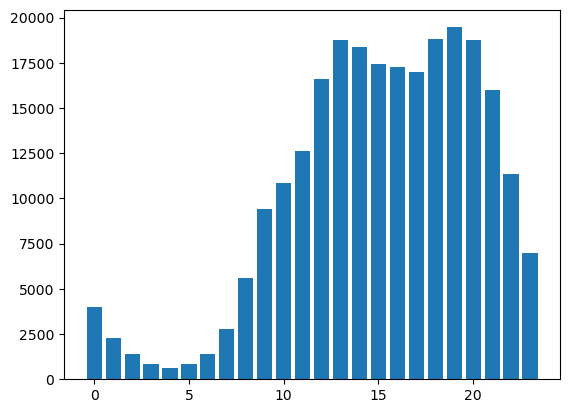

In [155]:
# Распределение транзакций по времени

plt.bar(transaction_df['record_date'].dt.hour.value_counts().index, transaction_df['record_date'].dt.hour.value_counts())

* Распределение кол-ва транзакций имеет форму синуса, имеющего два максимума: в обеденное время и после окончания рабочего дня. После 20 часов и до 4 утра наблюдается затухание  

In [213]:
# матрица корреляции для данных из файла 'transactions.csv'

transaction_df.corr(method='pearson')

,merchant_id,latitude,longitude
merchant_id,1.000000,-0.005612,0.027933
latitude,-0.005612,1.000000,0.620828
longitude,0.027933,0.620828,1.000000


In [222]:
stats.pearsonr(transaction_df['merchant_id'],transaction_df['latitude'])

PearsonRResult(statistic=-0.005612184809151751, pvalue=0.005071340640452128)

In [224]:
stats.pearsonr(transaction_df['merchant_id'],transaction_df['longitude'])

PearsonRResult(statistic=0.027932504224529177, pvalue=3.1100907158492256e-44)

In [225]:
stats.pearsonr(transaction_df['longitude'],transaction_df['latitude'])

PearsonRResult(statistic=0.6208280907850694, pvalue=0.0)

* pvalue << 0.05, следовательно корреляция отсутствует между merchant_id и широтой/долготой
* корреляция есть между широтой и долготой

In [215]:
# матрица корреляции для данных из файла 'merchants_train.csv'

train_df.corr(method='spearman')

,merchant_id,latitude,longitude
merchant_id,1.000000,-0.070891,0.015472
latitude,-0.070891,1.000000,-0.453970
longitude,0.015472,-0.453970,1.000000


In [226]:
stats.pearsonr(train_df['longitude'],train_df['latitude'])

PearsonRResult(statistic=-0.28438711396674443, pvalue=7.473532062984634e-121)

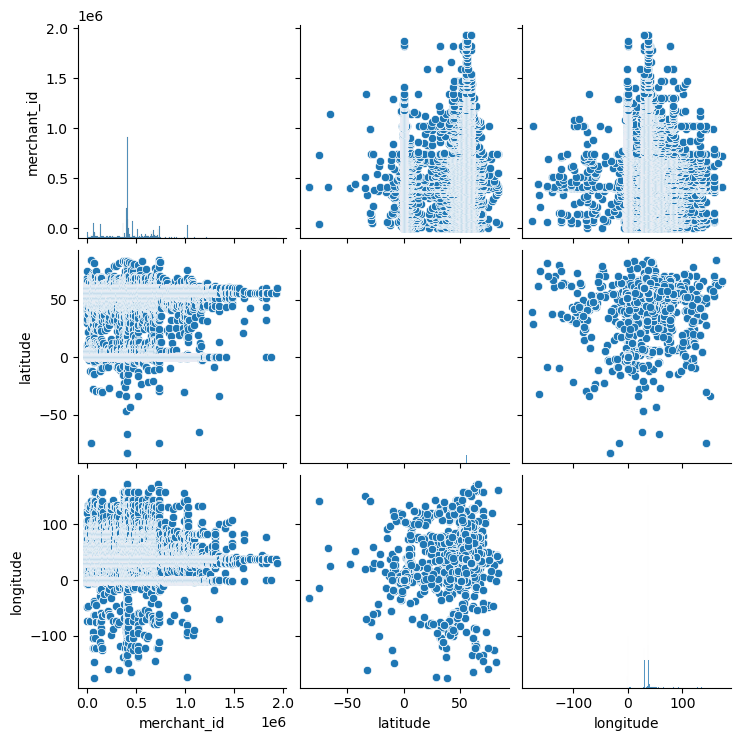

In [134]:
# зависимость merchant_id от широты и долготы 

sns.pairplot(transaction_df)

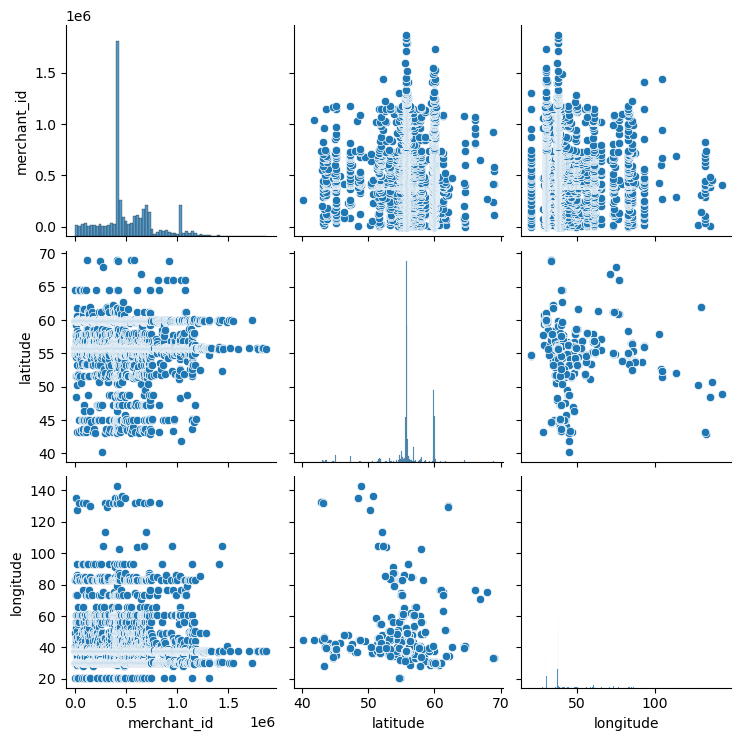

In [135]:
sns.pairplot(train_df)

* исходя из графиков и матрицы корреляции можно саказать, что корреляция между merchant_id и географией отсутсвует, поэтому прогнозирование широты и долготы по представленным данным не имеет практической ценности